In [1]:
import pandas as pd
from univariate import univariate
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [4]:
dataset.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
# 1)Replace the NaN values with correct value. And justify why you have chosen the same

In [6]:
# In this student placement database, salary is directly tied to placement status. 
# Students with a null salary should not be marked as placed. 
# If a placed student has a null salary (indicating potential training or project assignment delays), 
# the null value should be replaced with zero to maintain database integrity without altering meaning. 
# Salaries recorded as null due to human error will be replaced with the mean salary.

In [7]:
placed_count = (dataset["salary"].isna() & (dataset["status"] == "Placed")).sum()
not_placed_count = (dataset["salary"].isna() & (dataset["status"] == "Not Placed")).sum()
null_status_count = (dataset["salary"].isna() & (dataset["status"].isna())).sum()
print(f"Placed with null salary: {placed_count}")
print(f"Not Placed with null salary: {not_placed_count}")
print(f"Null status with null salary: {null_status_count}")


Placed with null salary: 0
Not Placed with null salary: 67
Null status with null salary: 0


In [8]:
# Since null salaries signify unplaced students, I'm substituting null values with zero

In [9]:
dataset.fillna(0,inplace=True)

In [10]:
dataset.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [11]:
# 2)How many of them are not placed

In [12]:
not_placed_count = (dataset["status"] == "Not Placed").sum()
print(f"Not Placed Students Count: {not_placed_count}")

Not Placed Students Count: 67


In [13]:
# 3)Find the reason for non placement from the dataset?

In [14]:
placed = dataset[dataset['status'] == 'Placed']
not_placed = dataset[dataset['status'] == 'Not Placed']

In [15]:
academic_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
academic_means = pd.DataFrame({
    'Placed': placed[academic_cols].mean(),
    'Not Placed': not_placed[academic_cols].mean()
})

In [16]:
academic_means

Placed  Not Placed
ssc_p     71.721486   57.544030
hsc_p     69.926554   58.395522
degree_p  68.740541   61.134179
etest_p   73.238041   69.587910
mba_p     62.579392   61.612836

In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean Percentage')

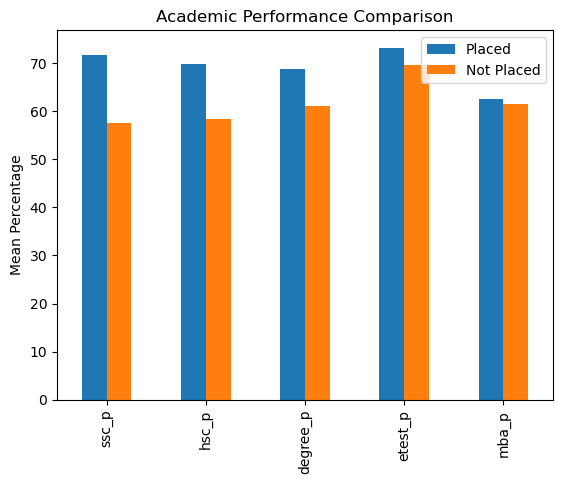

In [18]:
academic_means.plot(kind='bar', title='Academic Performance Comparison')
plt.ylabel('Mean Percentage')

In [19]:
workex_comparison = pd.crosstab(dataset['workex'], dataset['status'], normalize='index')
workex_comparison

status  Not Placed    Placed
workex                      
No        0.404255  0.595745
Yes       0.135135  0.864865

<Axes: title={'center': 'Work Experience Impact'}, xlabel='workex'>

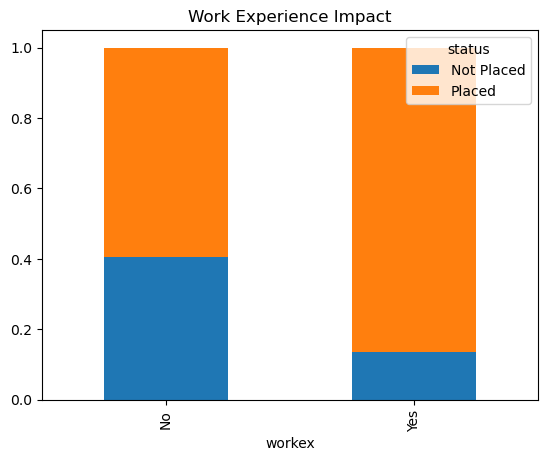

In [20]:
workex_comparison.plot(kind='bar', stacked=True, title='Work Experience Impact')

In [21]:
specialisation_comparison = pd.crosstab(dataset['specialisation'], dataset['status'], normalize='index')
specialisation_comparison

status          Not Placed    Placed
specialisation                      
Mkt&Fin           0.208333  0.791667
Mkt&HR            0.442105  0.557895

<Axes: title={'center': 'Specialization Impact'}, xlabel='specialisation'>

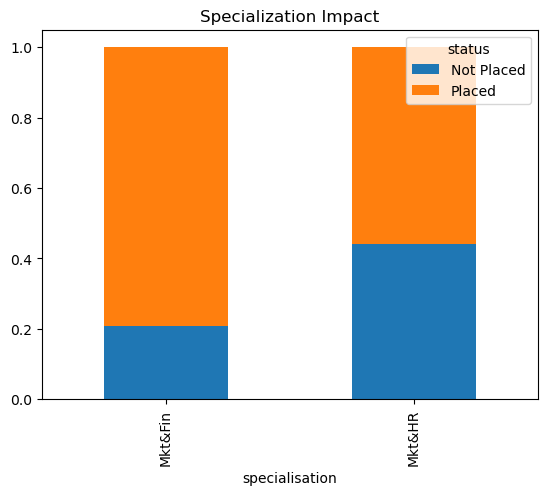

In [22]:
specialisation_comparison.plot(kind='bar', stacked=True, title='Specialization Impact')

In [23]:
# Academic performance differences
for col in academic_cols:
    diff = placed[col].mean() - not_placed[col].mean()
    if diff > 5:  # Threshold for significant difference
        print(f"• {col.upper()}: Placed students score {diff:.2f}% higher on average")

• SSC_P: Placed students score 14.18% higher on average
• HSC_P: Placed students score 11.53% higher on average
• DEGREE_P: Placed students score 7.61% higher on average


In [24]:
# Specialization analysis

In [25]:
len(placed[placed['specialisation'] == 'Mkt&HR'])

53

In [26]:
len(dataset[dataset['specialisation'] == 'Mkt&HR'])

95

In [27]:
mkt_hr_placement_rate = len(placed[placed['specialisation'] == 'Mkt&HR']) / len(dataset[dataset['specialisation'] == 'Mkt&HR'])
print(f"• Specialization: Mkt&HR has only {mkt_hr_placement_rate:.1%} placement rate")

• Specialization: Mkt&HR has only 55.8% placement rate


In [28]:
len(placed[placed['specialisation'] == 'Mkt&Fin'])

95

In [29]:
len(dataset[dataset['specialisation'] == 'Mkt&Fin'])

120

In [30]:
mkt_fin_placement_rate = len(placed[placed['specialisation'] == 'Mkt&Fin']) / len(dataset[dataset['specialisation'] == 'Mkt&Fin'])
print(f"• Specialization: Mkt&Fin has only {mkt_fin_placement_rate:.1%} placement rate")

• Specialization: Mkt&Fin has only 79.2% placement rate


In [31]:
# Gender analysis

In [32]:
gender_gap = len(not_placed[not_placed['gender'] == 'F']) / len(not_placed)
print(f"• Gender: Females represent {gender_gap:.1%} of not placed students")

• Gender: Females represent 41.8% of not placed students


In [33]:
gender_gap = len(not_placed[not_placed['gender'] == 'M']) / len(not_placed)
print(f"• Gender: Males represent {gender_gap:.1%} of not placed students")

• Gender: Males represent 58.2% of not placed students


In [34]:
# The above analysis reveals that pre-MBA academic performance, choice of specialization, and work experience are primary factors affecting placement rates.

In [35]:
# 4) What kind of relation between salary and mba_p

In [36]:
placed_df = dataset[dataset['status'] == 'Placed'].dropna(subset=['salary'])

In [37]:
print(placed_df[['mba_p', 'salary']].corr())

           mba_p    salary
mba_p   1.000000  0.175013
salary  0.175013  1.000000


In [38]:
print(placed_df[['mba_p', 'salary']].cov())

               mba_p        salary
mba_p      34.628316  9.624979e+04
salary  96249.789024  8.734295e+09


In [39]:
from scipy.stats import ttest_ind

In [40]:
hr_data = placed_df[placed_df['specialisation']=='Mkt&HR'][['mba_p', 'salary']]

In [41]:
fin_data=placed_df[placed_df['specialisation']=='Mkt&Fin'][['mba_p', 'salary']]

In [42]:
ttest_ind(hr_data,fin_data)

TtestResult(statistic=array([-2.15110202, -1.79042766]), pvalue=array([0.03311365, 0.07545741]), df=array([146., 146.]))

In [43]:
# mba_p vs salary correlation: 0.175013
# This indicates a weak positive correlation between MBA percentage and salary
#The correlation is close to 0, suggesting that MBA percentage alone does not strongly predict salary levels

In [44]:
# Covariance between mba_p and salary: 96,249.79
# The positive covariance confirms they tend to move in the same direction

In [45]:
# 5)Which specialization is getting minimum salary?

In [46]:
# Significant difference exists between Mkt&HR and Mkt&Fin specializations (p < 0.05)
# The negative t-statistic suggests Mkt&Fin students tend to have higher salaries than Mkt&HR students
# we can reject the null hypothesis

In [47]:
#  6)How many of them getting above 500000 salary?

In [48]:
print(f"• Students are getting more than 50K salaries: {len(placed_df[placed_df['salary'] > 50000])}")

• Students are getting more than 50K salaries: 148


In [49]:
# 7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [50]:
from scipy.stats import stats

In [51]:
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

C:\Users\karth\AppData\Local\Temp\ipykernel_17660\2503646021.py:1: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  stats.f_oneway(dataset['etest_p'],dataset['mba_p'])


F_onewayResult(statistic=np.float64(98.64487057324706), pvalue=np.float64(4.672547689133573e-21))

In [52]:
# If p-value ≥ 0.05: Fail to reject H₀ (no significant difference).

In [53]:
#  8)Test the similarity between the degree_t(Sci&Tech) and specialisa
# tion(Mkt&HR) with respect to salary at significance level of 5%.(Make
# decision using Hypothesis Testing)

In [54]:
dataset.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       0.0  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [55]:
df=dataset.copy()
# Filter valid data (placed students)
df_placed = df[df['status'] == 'Placed']

# A student can belong to both groups (e.g., degree_t = Sci&Tech and specialisation = Mtt&HR).
# This violates the independence assumption of both ANOVA and t-tests.
# Define mutually exclusive groups:
group1 = df_placed[(df_placed['degree_t'] == 'Sci&Tech') & (df_placed['specialisation'] != 'Mkt&HR')]['salary']
group2 = df_placed[(df_placed['specialisation'] == 'Mkt&HR') & (df_placed['degree_t'] != 'Sci&Tech')]['salary']

t_stat, p_value = stats.ttest_ind(group1, group2,nan_policy='omit', equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# Decision (α=0.05)
if p_value < 0.05:
    print("Reject H0: Mean salaries are significantly different.")
else:
    print("Fail to reject H0: No evidence of difference in mean salaries.")

t-statistic: 2.738420238043324, p-value: 0.010613514905838011
Reject H0: Mean salaries are significantly different.


C:\Users\karth\AppData\Local\Temp\ipykernel_17660\3145140284.py:11: DeprecationWarning: Please import `ttest_ind` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  t_stat, p_value = stats.ttest_ind(group1, group2,nan_policy='omit', equal_var=False)


In [56]:
# 9)Convert the normal distribution to standard normal distribution for salary column

In [57]:
def std_normal_graph(salary_data):
   
    # Filter out missing/zero salaries
    clean_salaries = salary_data[salary_data > 0].dropna()
    
    # Calculate z-scores
    mean = clean_salaries.mean()
    std = clean_salaries.std()
    zscores = [(x - mean) / std for x in clean_salaries]


    # Plot using modern Seaborn functions
    plt.figure(figsize=(10, 6))
    sns.histplot(zscores, kde=True, stat='density', linewidth=0)
    plt.title('Standard Normal Distribution of Salaries')
    plt.xlabel('Z-scores')
    plt.ylabel('Density')
    plt.axvline(0, color='r', linestyle='--', label='Mean (μ=0)')
    plt.legend()
    plt.show()


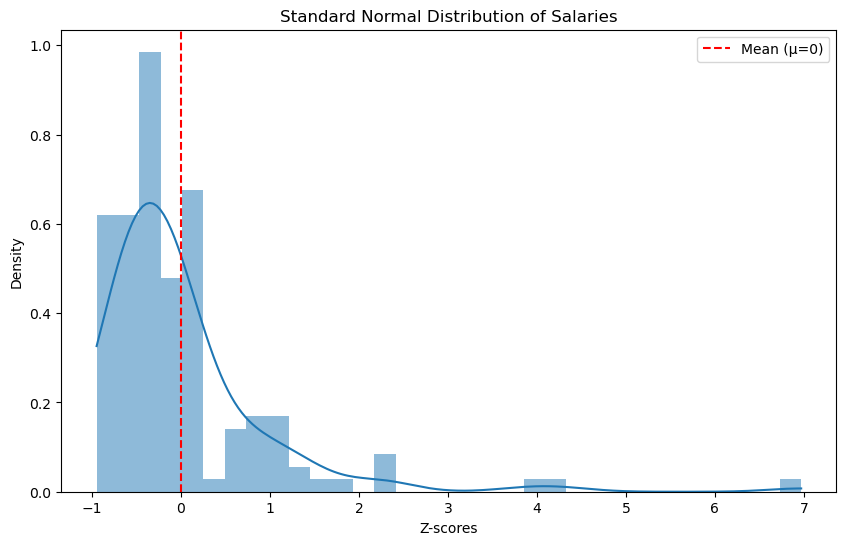

In [58]:
# Usage
std_normal_graph(dataset['salary'])

In [59]:
# 10)What is the probability Density Function of the salary range from 700000 to 900000?

In [60]:
def salary_range_probability(salary_data, sRange, eRange):
    from scipy.stats import norm
    import numpy as np
    
    # Filter valid salaries (placed students)
    clean_salaries = salary_data[salary_data > 0].dropna()
    
    # Calculate distribution parameters
    mean = clean_salaries.mean()
    std = clean_salaries.std()
    
    # Create normal distribution
    dist = norm(loc=mean, scale=std)
    
    # Calculate probability using CDF
    prob = dist.cdf(eRange) - dist.cdf(sRange)
    
    print(f"Mean: {mean:.2f}, Std Dev: {std:.2f}")
    print(f"Probability between {sRange:,} and {eRange:,}: {prob:.8f} ({prob*100:.5f}%)")
    return prob

In [61]:
salary_range_probability(dataset['salary'], 700000, 900000)

Mean: 288655.41, Std Dev: 93457.45
Probability between 700,000 and 900,000: 0.00000538 (0.00054%)


np.float64(5.377445759013888e-06)

In [64]:
def pdf(salary_data,sRange,eRange):
    
    ax=sns.distplot(salary_data,kde=True,kde_kws={'color':'blue'},color='Green')
    plt.axvline(sRange,color='Red')
    plt.axvline(eRange,color='Red')
    df = salary_data[salary_data > 0].dropna()
    df_mean=df.mean()
    df_std=df.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (df_mean,df_std))
    dist=norm(df_mean,df_std)
    lRange=[val for val in range(sRange,eRange)] #it creates a numbers between the sRange and eRange as a list 
    for val in lRange:
        print('LRange=%.3f' % (val))
    probalities=[dist.pdf(val) for val in lRange] #it passes the number one by one to dist.pdf method from the list lRange
    prob=sum(probalities)
    print('The area between range ({},{}):{}'.format(sRange,eRange,prob))


C:\Users\karth\AppData\Local\Temp\ipykernel_17660\2901129616.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(salary_data,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=288655.405, Standard Deviation=93457.452
LRange=700000.000
LRange=700001.000
LRange=700002.000
LRange=700003.000
LRange=700004.000
LRange=700005.000
LRange=700006.000
LRange=700007.000
LRange=700008.000
LRange=700009.000
LRange=700010.000
LRange=700011.000
LRange=700012.000
LRange=700013.000
LRange=700014.000
LRange=700015.000
LRange=700016.000
LRange=700017.000
LRange=700018.000
LRange=700019.000
LRange=700020.000
LRange=700021.000
LRange=700022.000
LRange=700023.000
LRange=700024.000
LRange=700025.000
LRange=700026.000
LRange=700027.000
LRange=700028.000
LRange=700029.000
LRange=700030.000
LRange=700031.000
LRange=700032.000
LRange=700033.000
LRange=700034.000
LRange=700035.000
LRange=700036.000
LRange=700037.000
LRange=700038.000
LRange=700039.000
LRange=700040.000
LRange=700041.000
LRange=700042.000
LRange=700043.000
LRange=700044.000
LRange=700045.000
LRange=700046.000
LRange=700047.000
LRange=700048.000
LRange=700049.000
LRange=700050.000
LRange=700051.000
LRange=700052.000


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



The area between range (700000,900000):5.377578376230696e-06


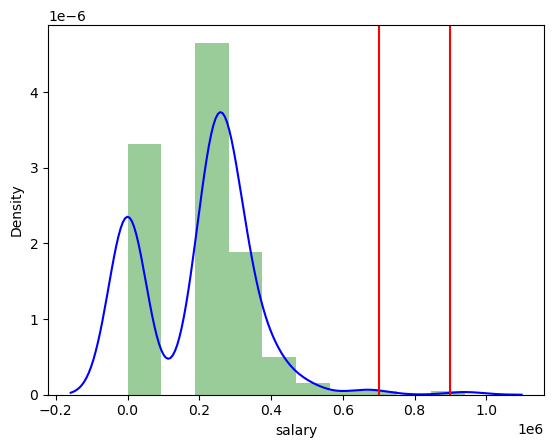

In [65]:
pdf(dataset['salary'],700000, 900000)

In [66]:
# 11)Test the similarity between the degree_t(Sci&Tech)with respect to
# etest_p and mba_p at significance level of 5%.(Make decision using Hy pothesis Testing)

In [67]:
dataset.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       0.0  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [68]:
# A paired t-test. This test determines if the means of these two paired measurements (from the same individuals) are significantly different.

In [69]:
df=dataset.copy()
# Filter Sci&Tech students and drop missing values

In [70]:
df[df['degree_t'] == 'Sci&Tech']

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
5        6      M  55.00   Others  49.80   Others   Science     67.25   
7        8      M  82.00  Central  64.00  Central   Science     66.00   
22      23      F  69.80   Others  60.80   Others   Science     72.23   
23      24      F  77.40   Others  60.00   Others   Science     64.74   
24      25      M  76.50   Others  97.70   Others   Science     78.86   
31      32      F  67.00  Central  53.00  Central   Science     65.00   
37      38      F  79.00  Central  76.00  Central   Science     65.60   
39      40      M  81.00   Others  68.00   Others   Science     64.00   
45      46      F  76.00  Central  64.00  Central   Science     72.00   
53      54      M  80.00   Others  70.00   Others   Science     72.00   
59      60      M  52.60  Central  65.58   Others   Science     72.11   
62      63      F  86.50   Others  64.20   Others   Science     67.40   
68      69      F  69.70  Central  47.00  Central  Commerce     72.70   
69      70      M  73.00  Central  73.00  Central   Science     66.00   
70      71      M  82.00   Others  61.00   Others   Science     62.00   
77      78      M  64.00   Others  80.00   Others   Science     65.00   
78      79      M  84.00   Others  90.90   Others   Science     64.50   
79      80      F  69.00  Central  62.00  Central   Science     66.00   
83      84      M  84.00   Others  79.00   Others   Science     68.00   
84      85      M  70.00  Central  63.00   Others   Science     70.00   
89      90      F  84.00   Others  75.00   Others   Science     69.00   
99     100      M  54.00  Central  82.00   Others  Commerce     63.00   
103    104      M  73.00  Central  78.00  Central   Science     73.00   
105    106      M  59.00  Central  64.00   Others   Science     58.00   
106    107      M  61.08   Others  50.00   Others   Science     54.00   
109    110      M  52.00  Central  63.00   Others   Science     65.00   
110    111      F  69.50  Central  70.00  Central   Science     72.00   
111    112      M  51.00   Others  54.00   Others   Science     61.00   
117    118      M  77.00   Others  75.00   Others   Science     73.00   
118    119      M  76.00  Central  80.00  Central   Science     78.00   
121    122      F  64.00  Central  67.00   Others   Science     69.60   
126    127      F  79.00   Others  61.00   Others   Science     75.50   
128    129      M  80.40  Central  73.40  Central   Science     77.72   
138    139      F  82.00   Others  64.00   Others   Science     73.00   
142    143      M  85.00  Central  60.00   Others   Science     73.43   
145    146      M  89.40   Others  65.66   Others   Science     71.25   
150    151      M  71.00  Central  58.66  Central   Science     58.00   
152    153      F  75.40   Others  60.50  Central   Science     84.00   
153    154      M  49.00   Others  59.00   Others   Science     65.00   
156    157      M  84.20  Central  69.40  Central   Science     65.00   
158    159      M  67.00   Others  63.00   Others   Science     64.00   
160    161      M  87.00  Central  74.00  Central   Science     65.00   
163    164      M  63.00   Others  67.00   Others   Science     64.00   
167    168      M  67.90   Others  62.00   Others   Science     67.00   
169    170      M  59.96   Others  42.16   Others   Science     61.26   
173    174      F  52.00   Others  52.00   Others   Science     55.00   
174    175      M  73.24   Others  50.83   Others   Science     64.27   
175    176      M  63.00   Others  62.00   Others   Science     65.00   
178    179      M  68.00   Others  56.00   Others   Science     68.00   
179    180      F  77.80  Central  64.00  Central   Science     64.20   
181    182      M  62.00  Central  60.33   Others   Science    

In [71]:
df[df['degree_t'] == 'Sci&Tech'][['mba_p','etest_p']]

mba_p  etest_p
0    58.80    55.00
1    66.28    86.50
3    59.43    66.00
5    51.58    55.00
7    62.14    67.00
22   68.81    55.53
23   63.62    92.00
24   74.01    97.40
31   58.32    64.00
37   55.47    58.00
39   62.56    93.00
45   66.53    58.00
53   71.04    87.00
59   56.66    57.60
62   59.69    59.00
68   59.24    79.00
69   68.07    70.00
70   65.45    89.00
77   57.65    69.00
78   59.42    86.04
79   67.99    75.00
83   66.69    84.00
84   62.00    55.00
89   62.36    62.00
99   59.47    50.00
103  65.83    85.00
105  55.30    85.00
106  65.69    71.00
109  56.09    86.00
110  54.80    57.20
111  60.64    60.00
117  67.05    80.00
118  70.48    97.00
121  71.49    55.67
126  68.20    70.00
128  76.26    81.20
138  71.77    96.00
142  61.29    60.00
145  63.23    72.00
150  61.30    56.00
152  65.25    98.00
153  62.48    86.00
156  52.72    80.00
158  61.87    60.00
160  72.29    75.00
163  66.46    75.00
167  75.71    58.10
169  65.48    54.48
173  59.32    67.00
174  66.23    64.00
175  60.69    87.50
178  68.07    73.00
179  72.14    75.50
181  60.02    63.00
187  64.86    95.00
196  54.48    78.00
197  69.71    59.32
202  60.11    61.28
211  53.62    74.00

In [72]:
sci_tech=df[df['degree_t'] == 'Sci&Tech'][['mba_p','etest_p']].dropna()

In [73]:
from scipy import stats

In [74]:
# Perform paired t-test
t_stat, p_value = stats.ttest_rel(sci_tech['etest_p'], sci_tech['mba_p'])
p_value

np.float64(5.517920600505392e-06)

In [75]:
print(f"t-statistic: {t_stat}, p-value: {p_value}")
if t_stat < 0.05:
    print("Reject H0: Significant difference between etest_p and mba_p.")
else:
    print("Fail to reject H0: No significant difference.")

t-statistic: 5.0049844583693615, p-value: 5.517920600505392e-06
Fail to reject H0: No significant difference.


In [76]:
#Threshold (α): Typically set to 0.05.
#If p-value < 0.05: Reject H₀ (significant difference).
#If p-value ≥ 0.05: Fail to reject H₀ (no significant difference).

When Would We Use ANOVA or Independent t-test or Paired t-test?

Scenario	Appropriate Test

Compare two measurements from the same group
(etest_p vs mba_p for Sci&Tech)	✅ Paired t-test

Compares two independent groups on one metric
(e.g., Do Sci&Tech and Comm&Mgmt students have different etest_p scores?) ttest_ind

Compare one measurement across ≥3 groups
(e.g., mba_p across Sci&Tech, Comm&Mgmt, Others)	✅ One-way ANOVA

Compare one measurement across groups with ≥2 factors
(e.g., mba_p by degree_t + gender)	✅ Two-way ANOVA

Key Takeaway:

For paired measurements from the same subjects, use:

Paired t-test (for 2 measurements)

Repeated Measures ANOVA (for ≥3 measurements over time)

For independent groups, use:

Independent t-test (2 groups)

ANOVA (≥3 groups)


In [77]:
#12) Which parameter is highly correlated with salary?

In [78]:
quan,qual=univariate.quanqual(dataset)

In [79]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [80]:
quan_df=dataset[quan]
quandf=quan_df.drop('sl_no',axis=1)

In [81]:
quandf

ssc_p  hsc_p  degree_p  etest_p  mba_p    salary
0    67.00  91.00     58.00     55.0  58.80  270000.0
1    79.33  78.33     77.48     86.5  66.28  200000.0
2    65.00  68.00     64.00     75.0  57.80  250000.0
3    56.00  52.00     52.00     66.0  59.43       0.0
4    85.80  73.60     73.30     96.8  55.50  425000.0
..     ...    ...       ...      ...    ...       ...
210  80.60  82.00     77.60     91.0  74.49  400000.0
211  58.00  60.00     72.00     74.0  53.62  275000.0
212  67.00  67.00     73.00     59.0  69.72  295000.0
213  74.00  66.00     58.00     70.0  60.23  204000.0
214  62.00  58.00     53.00     89.0  60.22       0.0

[215 rows x 6 columns]

In [82]:
quandf.corr()

ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
ssc_p     1.000000  0.511472  0.538404  0.261993  0.388478  0.538090
hsc_p     0.511472  1.000000  0.434206  0.245113  0.354823  0.452569
degree_p  0.538404  0.434206  1.000000  0.224470  0.402364  0.408371
etest_p   0.261993  0.245113  0.224470  1.000000  0.218055  0.186988
mba_p     0.388478  0.354823  0.402364  0.218055  1.000000  0.139823
salary    0.538090  0.452569  0.408371  0.186988  0.139823  1.000000

In [83]:
#Based on the above correlation matrix , the parameter ssc_p has the highest 
#correlation value 0.53 with salary at 0.538090.

In [84]:
#13) plot any useful graph and explain it.

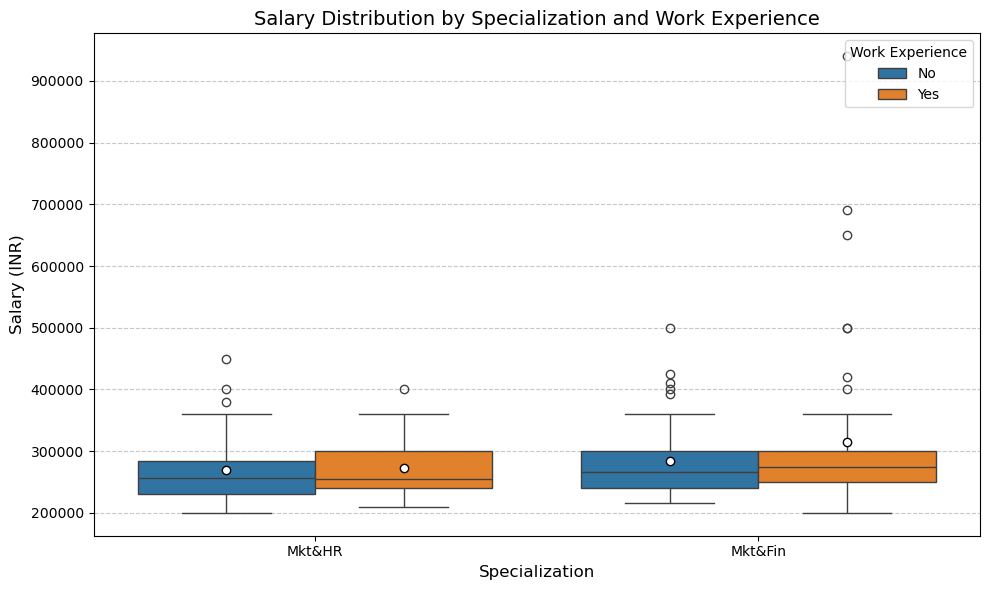

In [85]:
# Load and prepare data
df = pd.read_csv('Placement.csv')
placed = df[df['status'] == 'Placed'].copy()
placed['salary'] = pd.to_numeric(placed['salary'])

# Create visualization
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='specialisation', 
    y='salary', 
    hue='workex',
    data=placed,
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
)

plt.title('Salary Distribution by Specialization and Work Experience', fontsize=14)
plt.xlabel('Specialization', fontsize=12)
plt.ylabel('Salary (INR)', fontsize=12)
plt.legend(title='Work Experience', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Each "box" represents the salary distribution for a group

Box (Interquartile Range):	                          
Middle 50% of salaries (25th to 75th percentile)

Horizontal Line in Box:               
Median salary (50th percentile)

Whiskers:	                          
Normal salary range (covers 1.5x IQR)

Dots:	                              
Outliers (exceptionally high salaries)

White Circle:
Mean (average) salary

Premium Combination:
Mkt&Fin + Experience delivers highest salaries ( median 285k)

Specialization Greater then Experience:
Freshers in Mkt&Fin (median 250k) earn more than experienced Mkt&HR (median 240k)

Outlier Opportunities:
Top Mkt&Fin candidates with experience reach high salary (940k)